# Predicting conversion rate on an E-commerce website

Decision Tree are great way to predict the data. It has many benefits in classification 
and regression analysis. But it also has some lows as overfitting, unbalancing etc. To 
overcomes this lows following ensembles techniques are used :

1. Random forest 
2. Adaptive booster 
3. Gradient boosting 
4. XGBoost 
5. Bagging.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import plotly .offline as offline
import plotly.figure_factory as ff


## Data Processing 

We used some of the techniques on our E-shop data to find out perfect fitting model. After 
converting categorical data into number, we ran correlation map to find out highly correlated 
elements. It shows that *Exit Rate* and* Product Related* column has high correlation with bounce 
rate and Product Related Duration column,respectively. Therefore, we dropped it

In [11]:
####Cleaning data
# Importing dataset and examining it
dataset = pd.read_csv("E-Shop.csv")
print(dataset.head())
print(dataset.shape)
print(dataset.info())
print(dataset.describe())
# Converting catagorical into numerical
dataset['Month'] = dataset['Month'].map({'Jan':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'June':5, 'Jul':6, 'Aug':7, 'Sep':8, 'Oct':9, 'Nov':10,'Dec':11,})
dataset['VisitorType'] = dataset['VisitorType'].map({'Returning_Visitor':1, 'New_Visitor':0})
dataset['Weekend'] = dataset['Weekend'].map({True :1, False:0})
dataset['Transaction'] = dataset['Transaction'].map({True:1, False:0})


   Administrative  Administrative_Duration  ...  Weekend  Transaction
0               0                      0.0  ...    False        False
1               0                      0.0  ...    False        False
2               0                      0.0  ...    False        False
3               0                      0.0  ...    False        False
4               0                      0.0  ...     True        False

[5 rows x 14 columns]
(12245, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12245 entries, 0 to 12244
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12245 non-null  int64  
 1   Administrative_Duration  12245 non-null  float64
 2   Informational            12245 non-null  int64  
 3   Informational_Duration   12245 non-null  float64
 4   ProductRelated           12245 non-null  int64  
 5   ProductRelated_Duration  12245 non-null  float64
 6  

In [27]:
# Plotting Correlation Heatmap
corrs = dataset.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)



In [ ]:
figure

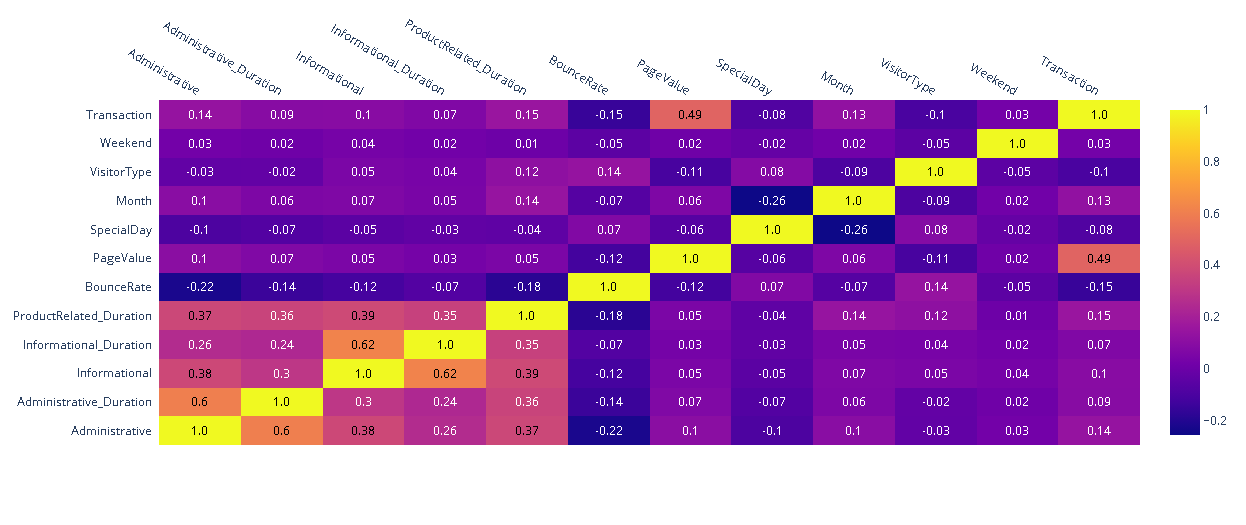

In [13]:
dataset= dataset.drop(['ExitRate','ProductRelated'],axis =1)

In [16]:
# Dividing dataset into label and feature sets
X = dataset.drop('Transaction', axis = 1) # Features
Y = dataset['Transaction'] # Labels
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

# Dividing dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split( X_scaled, Y, test_size = 0.3, random_state = 100)

print(X_train.shape)
print(X_test.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(12245, 11)
(12245,)
(8571, 11)
(3674, 11)


In [17]:
# Implementing Oversampling to balance the dataset using SMOT
print("Number of observations in each class before oversampling (training data): \n", pd.Series(Y_train).value_counts())
smote = SMOTE(random_state = 101)
X_train,Y_train = smote.fit_sample(X_train,Y_train)
print("Number of observations in each class after oversampling (training data): \n", pd.Series(Y_train).value_counts())

Number of observations in each class before oversampling (training data): 
 0    7248
1    1323
Name: Transaction, dtype: int64
Number of observations in each class after oversampling (training data): 
 1    7248
0    7248
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



## Model Creation

If we analyse 
confusion matrix we get that false positive are the people who are predicted as the one who 
made transaction but in reality they didn’t and false negative are people who actually did 
transaction but predicted as they didn’t. As an online store it is important for a website to not 
loose on potential customer. Therefore, it is important for to tune our model as we get minimum 
false positive. We believe false negative people are anyways going to make transaction. But if 
our model predict more false positive customer ,it is potential lose for shop as they won’t get 
chance to improve their experience as they are already classified as customer .

#### **Random Forest**

In [18]:
# Tuning the random forest parameter 'n_estimators' and implementing cross-validation using Grid Search
rfc = RandomForestClassifier(criterion='entropy', max_features='auto', random_state=1)
grid_param = {'n_estimators': [200, 250, 300, 350, 400,450]}
gd_sr = GridSearchCV(estimator=rfc, param_grid=grid_param, scoring='precision', cv=5)
gd_sr.fit(X_train, Y_train)
best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_ 
print(best_result)

{'n_estimators': 450}
0.9072774958638107


PageValue                  0.419886
ProductRelated_Duration    0.129607
Month                      0.115694
BounceRate                 0.093791
Administrative             0.083926
Administrative_Duration    0.073725
Informational_Duration     0.025348
Informational              0.024240
VisitorType                0.014071
Weekend                    0.011993
SpecialDay                 0.007716
dtype: float64
Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.90      0.92      3105
           1       0.57      0.72      0.64       569

    accuracy                           0.87      3674
   macro avg       0.76      0.81      0.78      3674
weighted avg       0.89      0.87      0.88      3674



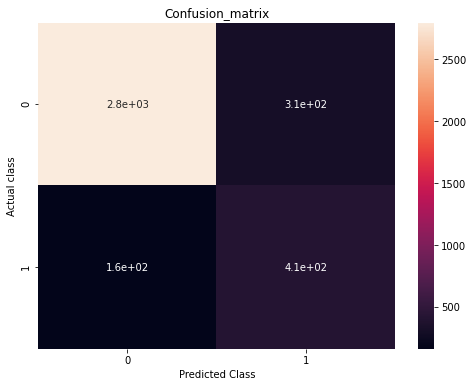

Confusion matrix: 
 [[2798  307]
 [ 160  409]]
TP:  409
TN:  2798
FP:  307
FN:  160


In [19]:
# Building random forest using the tuned parameter
rfc = RandomForestClassifier(n_estimators=350, criterion='entropy', max_features='auto', random_state=1)
rfc.fit(X_train,Y_train)
featimp = pd.Series(rfc.feature_importances_, index=list(X)).sort_values(ascending=False)
print(featimp)
# Predicitng on Test Data
Y_pred = rfc.predict(X_test)
print('Classification report: \n', metrics.classification_report(Y_test, Y_pred))
conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.90      0.92      3105
           1       0.56      0.72      0.63       569

    accuracy                           0.87      3674
   macro avg       0.75      0.81      0.77      3674
weighted avg       0.89      0.87      0.87      3674



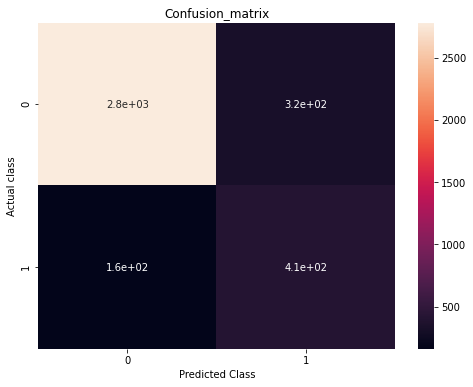

Confusion matrix: 
 [[2780  325]
 [ 161  408]]
TP:  408
TN:  2780
FP:  325
FN:  161


In [21]:
# Selecting features with higher sifnificance and building random forest
X1 = dataset[['PageValue','ProductRelated_Duration','Month','BounceRate','Administrative','Administrative_Duration']]
feature_scaler = StandardScaler()
X1_scaled = feature_scaler.fit_transform(X1)
X1_train, X1_test, Y1_train, Y1_test = train_test_split( X1_scaled, Y, test_size = 0.3, random_state = 100)
smote = SMOTE(random_state = 101)
X1_train,Y1_train = smote.fit_sample(X1_train,Y1_train)
rfc = RandomForestClassifier(n_estimators=350, criterion='entropy', max_features='auto', random_state=1)
rfc.fit(X1_train,Y1_train)
Y_pred = rfc.predict(X1_test)
print('Classification report: \n', metrics.classification_report(Y1_test, Y_pred))
conf_mat = metrics.confusion_matrix(Y1_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])

**Result** : We used random forest method on the dataset, using 
grid search we got that total number of trees to be grown are 
350 and feature importance’s list. 
When used all the variable we get False positive as 325.But we 
know that using all variables results in overfitting model and 
wrong result. To avoid this problem, we use difference 
combination of features importance to find better result. When 
we used first 8 features, we our result is slightly above the old 
result. Even if the FP number is increasing little bit our model 
is not overfitting.

#### **Adaptive boost** :

Administrative             0.487273
Month                      0.196364
Informational              0.127273
PageValue                  0.049091
BounceRate                 0.047273
ProductRelated_Duration    0.043636
Administrative_Duration    0.025455
Informational_Duration     0.010909
SpecialDay                 0.007273
VisitorType                0.003636
Weekend                    0.001818
dtype: float64
Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.91      0.93      3105
           1       0.59      0.69      0.63       569

    accuracy                           0.88      3674
   macro avg       0.76      0.80      0.78      3674
weighted avg       0.89      0.88      0.88      3674



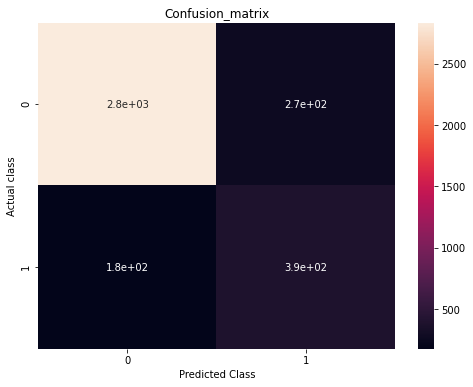

Confusion matrix: 
 [[2833  272]
 [ 179  390]]
TP:  390
TN:  2833
FP:  272
FN:  179


In [23]:

# Tuning the AdaBoost parameter 'n_estimators' and implementing cross-validation using Grid Search
abc = AdaBoostClassifier(random_state=1)
grid_param = {'n_estimators': [200,400,550,450]}
gd_sr = GridSearchCV(estimator=abc, param_grid=grid_param, scoring='precision', cv=5)
gd_sr.fit(X_train, Y_train)
best_parameters = gd_sr.best_params_
#print(best_parameters)
#best_result = gd_sr.best_score_ 
#print(best_result)

# Building AdaBoost using the tuned parameter
abc = AdaBoostClassifier(n_estimators=550, random_state=1)
abc.fit(X_train,Y_train)
featimp = pd.Series(abc.feature_importances_, index=list(X)).sort_values(ascending=False)
print(featimp)
# Applying adaboost on test data
Y_pred = abc.predict(X_test)
print('Classification report: \n', metrics.classification_report(Y_test, Y_pred))
conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])

**Result**: In adaptive boosting technique, we grow our decision tree simultaneously along with 
strengthening the weak classifier. It corrects the weight of wrongly classified data and learn 
from it. When we ran grid search for AdaBoost model we get n-estimetre as 550. 
After completion of training and testing model we got very improved result. Our AdaBoost 
model were giving less false positives than random forest. Performance was improved by 
almost 12%. When we see the feature importances we see Administrative and Month playes 
more significant rold in correctoredicton.AdaBoost predicts 87% correct result.

#### **Gradient Boosting** :

PageValue                  0.659790
Month                      0.127201
Administrative             0.056753
ProductRelated_Duration    0.049246
BounceRate                 0.040187
Administrative_Duration    0.030965
Informational              0.011774
Informational_Duration     0.011053
VisitorType                0.006451
SpecialDay                 0.004181
Weekend                    0.002400
dtype: float64
Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      3105
           1       0.60      0.67      0.63       569

    accuracy                           0.88      3674
   macro avg       0.77      0.79      0.78      3674
weighted avg       0.89      0.88      0.88      3674



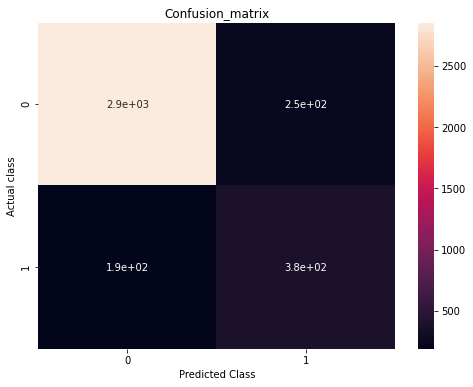

Confusion matrix: 
 [[2853  252]
 [ 190  379]]
TP:  379
TN:  2853
FP:  252
FN:  190


In [25]:
# Tuning the Gradent Boost parameter 'n_estimators', 'Max_depth' and ' Leaf_Node; and implementing cross-validation using Grid Search
#gbc = GradientBoostingClassifier(random_state=1)
#grid_param = {'n_estimators': [100,150,200,250,300], 'max_depth' : [4,5,6,8,9,10,11,12], 'max_leaf_nodes': [8,12,16,20,24,28,32]}
#gd_sr = GridSearchCV(estimator=gbc, param_grid=grid_param, scoring='precision', cv=5)
#gd_sr.fit(X_train, Y_train)
#best_parameters = gd_sr.best_params_
#print(best_parameters)
#best_result = gd_sr.best_score_ 
#print(best_result)

# Building Gradient Boost using the tuned parameter
gbc = GradientBoostingClassifier(n_estimators=200, max_depth=10, max_leaf_nodes=32, random_state=1)
gbc.fit(X_train,Y_train)
featimp = pd.Series(gbc.feature_importances_, index=list(X)).sort_values(ascending=False)
print(featimp)
#applying gradent boost on test data
Y_pred = gbc.predict(X_test)
print('Classification report: \n', metrics.classification_report(Y_test, Y_pred))
conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])

**Result**: Gradient Boosting techniques is like Adaboost techniques, where trees are grown while 
learning from mistakes. The major difference between Adaptive Boost and Gradient boost 
is how algorithms identifies shortcoming in weak learner. After running Grid search using 
gradient boosting classifier the algorithm tells us that 200 optimum number of trees to be 
grown with the depth of 10 and each having 32 leaf nodes. This information tells us how 
big our trees are going to grow. The results were much better this time and we can say that 
our model is learning from it’s mistakes.
As our model learnd from eveyr mistake it does, Gradient boos methode allows us to 
minimise the false positive significantly . Even though it slightly increases false negative, 
these are still going to be our customer and we don’t have to worry about them.It improves 
our model by 18.9% with respect to random forest. we can observe number of page person 
go through increases the prediction rate

## Conclusion

We recommend website to use Gradient boost model to predict if the person will make 
transaction or not. As this model gives least amount of false positive with 87.9% of corrcte 
prediction.which will allow website to improve the experience of more people and convert 
them. If our model predict that’s a person will not convert our webiste can pull that 
customer to the most effective pages using better ads, attractive recommendation and 
offers. The great way to pull negative predicted customer is by giving little bit discount. I 
belive if a customer is predicted as Non converting giving him little discount might 
increase chances of transaction.Website can run a marketing campaing on special days,as 
most of the people buys goods on such days. Website can also make more engading and 
attractive pages, as more pages a person visit the better model prediction and easier it is 
for website to show relevant ads and product. Also by minimising the bounce rate by right 
landing page optimisation will help webiste to increase the sales.I belive these are some 
baisc recommendation will help in improvning the transactions